In [87]:
import pandas as pd
import numpy as np

In [88]:
df = pd.read_csv("Resources/EURUSD_2022_01.csv")
df.head()

,Date,Time,Open,High,Low,Close,M
0,2022.01.03,0:02,1.13674,1.13674,1.13674,1.13674,1
1,2022.01.03,0:03,1.13663,1.13674,1.13663,1.13674,5
2,2022.01.03,0:04,1.13663,1.13687,1.13663,1.13687,3
3,2022.01.03,0:05,1.13674,1.13687,1.13674,1.13674,3
4,2022.01.03,0:06,1.13684,1.13684,1.13644,1.13644,5


In [89]:
df2 = pd.read_csv("Resources/Replaced_data.csv")
df2.head()

,Date,Time,Currency,Description,Actual,Forecast,Previous
0,2021.07.19,04:00,NZD,BusinessNZ Services Index,58.6,NaN,56.3
1,2021.07.19,04:31,GBP,Rightmove HPI m/m,0.007,NaN,0.008
2,2021.07.19,15:30,EUR,German Buba Monthly Report,NaN,NaN,NaN
3,2021.07.19,15:30,GBP,MPC Member Haskel Speaks,NaN,NaN,NaN
4,2021.07.19,19:30,USD,NAHB Housing Market Index,80,82,81


In [90]:
df2['Datetime'] = df2[['Date','Time']].apply(lambda x: str(x[0]) + "_" + str(x[1]))
df2.head()

,Date,Time,Currency,Description,Actual,Forecast,Previous,Datetime
0,2021.07.19,04:00,NZD,BusinessNZ Services Index,58.6,NaN,56.3,NaN
1,2021.07.19,04:31,GBP,Rightmove HPI m/m,0.007,NaN,0.008,NaN
2,2021.07.19,15:30,EUR,German Buba Monthly Report,NaN,NaN,NaN,NaN
3,2021.07.19,15:30,GBP,MPC Member Haskel Speaks,NaN,NaN,NaN,NaN
4,2021.07.19,19:30,USD,NAHB Housing Market Index,80,82,81,NaN


In [91]:
df2 = df2[df2["Currency"].isin(['EUR','USD'])]
df2.head()

,Date,Time,Currency,Description,Actual,Forecast,Previous,Datetime
2,2021.07.19,15:30,EUR,German Buba Monthly Report,NaN,NaN,NaN,NaN
4,2021.07.19,19:30,USD,NAHB Housing Market Index,80,82,81,NaN
5,2021.07.19,21:00,USD,President Biden Speaks,NaN,NaN,NaN,NaN
9,2021.07.20,11:30,EUR,German PPI m/m,0.013,0.013,0.015,NaN
10,2021.07.20,13:30,EUR,Current Account,11.7B,24.3B,22.1B,NaN


In [92]:
df["Datetime"] = df['Date'] + "_" +df['Time']
df2["Datetime"] = df2['Date']+"_" +df2['Time']
df["Datetime"] = pd.to_datetime(df['Datetime'], format='%Y.%m.%d_%H:%M')
df.index = df["Datetime"] +  pd.to_timedelta(2.5, unit='h')
df2.index = pd.to_datetime(df2['Datetime'], format='%Y.%m.%d_%H:%M')

In [93]:
df = df.drop(["Date","Time","M","Datetime"],1)
df.head()

,Open,High,Low,Close
Datetime,,,,
2022-01-03 02:32:00,1.13674,1.13674,1.13674,1.13674
2022-01-03 02:33:00,1.13663,1.13674,1.13663,1.13674
2022-01-03 02:34:00,1.13663,1.13687,1.13663,1.13687
2022-01-03 02:35:00,1.13674,1.13687,1.13674,1.13674
2022-01-03 02:36:00,1.13684,1.13684,1.13644,1.13644


In [94]:
df2 = df2.drop(["Date","Time","Forecast","Datetime"],1)
df2.head()

,Currency,Description,Actual,Previous
Datetime,,,,
2021-07-19 15:30:00,EUR,German Buba Monthly Report,NaN,NaN
2021-07-19 19:30:00,USD,NAHB Housing Market Index,80,81
2021-07-19 21:00:00,USD,President Biden Speaks,NaN,NaN
2021-07-20 11:30:00,EUR,German PPI m/m,0.013,0.015
2021-07-20 13:30:00,EUR,Current Account,11.7B,22.1B


In [95]:
df_merged = df.join(df2,on='Datetime')
df_merged.head()

,Open,High,Low,Close,Currency,Description,Actual,Previous
Datetime,,,,,,,,
2022-01-03 02:32:00,1.13674,1.13674,1.13674,1.13674,NaN,NaN,NaN,NaN
2022-01-03 02:33:00,1.13663,1.13674,1.13663,1.13674,NaN,NaN,NaN,NaN
2022-01-03 02:34:00,1.13663,1.13687,1.13663,1.13687,NaN,NaN,NaN,NaN
2022-01-03 02:35:00,1.13674,1.13687,1.13674,1.13674,NaN,NaN,NaN,NaN
2022-01-03 02:36:00,1.13684,1.13684,1.13644,1.13644,NaN,NaN,NaN,NaN


In [96]:
df_merged['pip_value_for_Rs.10000'] = (df['Close']-df['Open'])*10000/df['Close']
df_merged.head()

,Open,High,Low,Close,Currency,Description,Actual,Previous,pip_value_for_Rs.10000
Datetime,,,,,,,,,
2022-01-03 02:32:00,1.13674,1.13674,1.13674,1.13674,NaN,NaN,NaN,NaN,0.000000
2022-01-03 02:33:00,1.13663,1.13674,1.13663,1.13674,NaN,NaN,NaN,NaN,0.967680
2022-01-03 02:34:00,1.13663,1.13687,1.13663,1.13687,NaN,NaN,NaN,NaN,2.111059
2022-01-03 02:35:00,1.13674,1.13687,1.13674,1.13674,NaN,NaN,NaN,NaN,0.000000
2022-01-03 02:36:00,1.13684,1.13684,1.13644,1.13644,NaN,NaN,NaN,NaN,-3.519763


<AxesSubplot:xlabel='Datetime'>

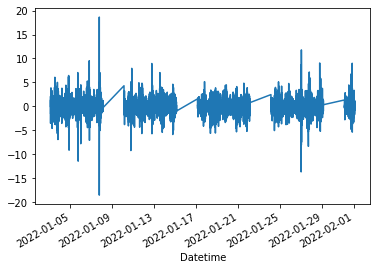

In [97]:
df_merged['pip_value_for_Rs.10000'].plot()

<AxesSubplot:xlabel='Datetime'>

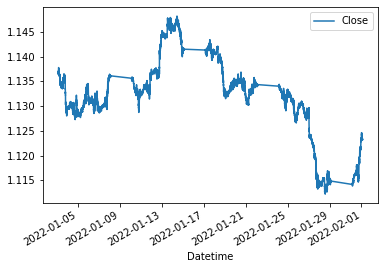

In [104]:
df_merged[['Close']].plot()


In [10]:
# df_merged.to_csv("Resources/Trade.csv")

In [11]:
df_merged['Currency'].value_counts()

USD    82
EUR    76
Name: Currency, dtype: int64

In [12]:
df_merged.shape[0]

30194

# Time series forecasting

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
X = df_merged[['Close']]
X.head()

,Close
Datetime,
2022-01-03 02:32:00,1.13674
2022-01-03 02:33:00,1.13674
2022-01-03 02:34:00,1.13687
2022-01-03 02:35:00,1.13674
2022-01-03 02:36:00,1.13644


In [134]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.68131257],
       [0.68131257],
       [0.6849277 ],
       ...,
       [0.30756396],
       [0.30923248],
       [0.30895439]])

In [136]:
hops = 60
total_len = X_scaled.shape[0]
X_train =[]
Y_train = []
for i in range(60,total_len):
    X_train.append(X_scaled[i-60:i])
    Y_train.append(X_scaled[i])
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [137]:
X_train.shape[1]

60

In [138]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Flatten,Dropout

In [139]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [140]:
model.fit(X_train,Y_train,epochs=6,batch_size=32)

Epoch 1/6
942/942 [==============================] - 30s 29ms/step - loss: 0.0046
Epoch 2/6
942/942 [==============================] - 27s 29ms/step - loss: 0.0016
Epoch 3/6
942/942 [==============================] - 29s 30ms/step - loss: 0.0011
Epoch 4/6
942/942 [==============================] - 29s 30ms/step - loss: 7.5379e-04
Epoch 5/6
942/942 [==============================] - 28s 30ms/step - loss: 5.4776e-04
Epoch 6/6
942/942 [==============================] - 29s 31ms/step - loss: 4.3170e-04


In [141]:
test = X_scaled[-80:]
test.shape

(80, 1)

In [142]:
hops = 60
X_test =[]
Y_test = []
for i in range(60,test.shape[0]):
    X_test.append(test[i-60:i])
X_test = np.array(X_test)

In [143]:
y_test_pred = model.predict(X_test)

1/1 [==============================] - 1s 556ms/step


In [144]:
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = np.array(X[-20:].values)

In [145]:
y_test_pred = y_test_pred.reshape(1,-1)
y_test_actual = y_test_actual.reshape(1,-1)
y_test_pred[0]

array([1.1233227, 1.1233217, 1.1233232, 1.1233262, 1.1233321, 1.1233374,
       1.1233431, 1.1233467, 1.123348 , 1.1233463, 1.1233497, 1.1233528,
       1.123357 , 1.1233622, 1.123373 , 1.1233809, 1.1233919, 1.1234024,
       1.1234118, 1.1234236], dtype=float32)

In [146]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test_actual,y_test_pred))
RMSE
# RMSE is very high for pip values while very low for open prices

0.00010971758648029763

[]

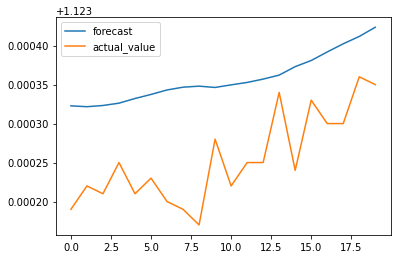

In [147]:
%matplotlib inline 
y_pred = pd.Series(y_test_pred[0])
y_actual = pd.Series(y_test_actual[0])
plt.plot(y_pred,label='forecast')
plt.plot(y_actual,label = 'actual_value')
plt.legend()
plt.plot()
# Close - Close price correctly forecasts increasing trend and overestimates the closing price by around 0.0001
# PIP - actual pip value is fluctuating between Rs.-0.5 to Rs.1 per minute while forecasted value is near -0.1

<AxesSubplot:ylabel='Density'>

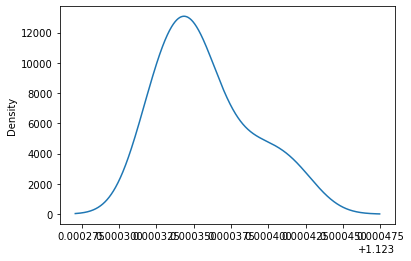

In [148]:
y_pred.plot(kind='kde')
# normal distribution with little skewness

<AxesSubplot:ylabel='Density'>

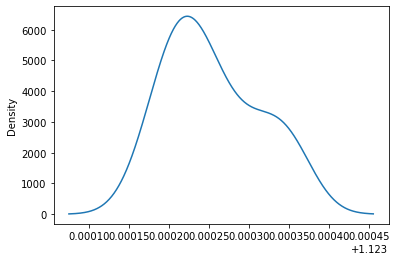

In [149]:
y_actual.plot(kind='kde')
# similar distribution shape as distribution of forecasted values

In [ ]:
# Conclusion: use time series forecasting to forecast open/close values and news prediction for getting impact of news on pip

# Regression for pip prediction on forex calendar data

In [150]:
# Target = pip value
# feature = currency,description,actual,previous
# index = Datetime

In [209]:
forex = df_merged[['Currency','Description','Actual','Previous','pip_value_for_Rs.10000']]
forex.head()

,Currency,Description,Actual,Previous,pip_value_for_Rs.10000
Datetime,,,,,
2022-01-03 02:32:00,NaN,NaN,NaN,NaN,0.000000
2022-01-03 02:33:00,NaN,NaN,NaN,NaN,0.967680
2022-01-03 02:34:00,NaN,NaN,NaN,NaN,2.111059
2022-01-03 02:35:00,NaN,NaN,NaN,NaN,0.000000
2022-01-03 02:36:00,NaN,NaN,NaN,NaN,-3.519763


In [210]:
forex['Currency'] = forex['Currency'].apply(lambda x: -1 if x=="EUR" else 1)
forex.head()

<ipython-input-210-d7023e5edf8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forex['Currency'] = forex['Currency'].apply(lambda x: -1 if x=="EUR" else 1)


,Currency,Description,Actual,Previous,pip_value_for_Rs.10000
Datetime,,,,,
2022-01-03 02:32:00,1,NaN,NaN,NaN,0.000000
2022-01-03 02:33:00,1,NaN,NaN,NaN,0.967680
2022-01-03 02:34:00,1,NaN,NaN,NaN,2.111059
2022-01-03 02:35:00,1,NaN,NaN,NaN,0.000000
2022-01-03 02:36:00,1,NaN,NaN,NaN,-3.519763


In [211]:
forex = forex.dropna(0)
# forex[['Actual','Previous']] = forex[['Actual','Previous']].astype(float)
forex.head()

,Currency,Description,Actual,Previous,pip_value_for_Rs.10000
Datetime,,,,,
2022-01-03 13:45:00,-1,Spanish Manufacturing PMI,56.2,57.1,-0.352258
2022-01-03 14:15:00,-1,Italian Manufacturing PMI,62,62.8,-1.233861
2022-01-03 14:20:00,-1,French Final Manufacturing PMI,55.6,54.9,1.849862
2022-01-03 14:25:00,-1,German Final Manufacturing PMI,57.4,57.9,-2.202313
2022-01-03 14:30:00,-1,Final Manufacturing PMI,58,58,2.994302


In [217]:
forex.Description.value_counts()
# insufficient data

Unemployment Claims                   4
Natural Gas Storage                   4
Crude Oil Inventories                 4
Final Services PMI                    2
Final Manufacturing PMI               2
                                     ..
ZEW Economic Sentiment                1
Federal Funds Rate                    1
German Retail Sales m/m               1
Housing Starts                        1
Revised UoM Inflation Expectations    1
Name: Description, Length: 123, dtype: int64

<AxesSubplot:xlabel='Description'>

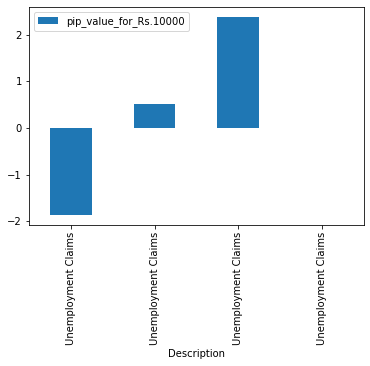

In [218]:
forex[forex['Description']=='Unemployment Claims'].plot.bar(x='Description',y='pip_value_for_Rs.10000')

In [195]:
forex = forex.join(pd.get_dummies(forex['Description']))
forex.head()

,Currency,Description,Actual,Previous,pip_value_for_Rs.10000,ADP Non-Farm Employment Change,Advance GDP Price Index q/q,Advance GDP q/q,Average Hourly Earnings m/m,Belgian NBB Business Climate,...,Spanish Flash GDP q/q,Spanish Manufacturing PMI,Spanish Services PMI,Spanish Unemployment Change,Spanish Unemployment Rate,TIC Long-Term Purchases,Trade Balance,Unemployment Claims,Unemployment Rate,ZEW Economic Sentiment
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 13:45:00,-1,Spanish Manufacturing PMI,56.2,57.1,-0.352258,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2022-01-03 14:15:00,-1,Italian Manufacturing PMI,62,62.8,-1.233861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03 14:20:00,-1,French Final Manufacturing PMI,55.6,54.9,1.849862,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03 14:25:00,-1,German Final Manufacturing PMI,57.4,57.9,-2.202313,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03 14:30:00,-1,Final Manufacturing PMI,58,58,2.994302,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
Y = forex['pip_value_for_Rs.10000']
X = forex.drop(['Description','pip_value_for_Rs.10000'],1)
X.head()

,Currency,Actual,Previous,ADP Non-Farm Employment Change,Advance GDP Price Index q/q,Advance GDP q/q,Average Hourly Earnings m/m,Belgian NBB Business Climate,Building Permits,Business Inventories m/m,...,Spanish Flash GDP q/q,Spanish Manufacturing PMI,Spanish Services PMI,Spanish Unemployment Change,Spanish Unemployment Rate,TIC Long-Term Purchases,Trade Balance,Unemployment Claims,Unemployment Rate,ZEW Economic Sentiment
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 13:45:00,-1,56.2,57.1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2022-01-03 14:15:00,-1,62,62.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03 14:20:00,-1,55.6,54.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03 14:25:00,-1,57.4,57.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03 14:30:00,-1,58,58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,Y_train,X_test,Y_test = train_test_split(X,Y,test_size=0.3)

In [198]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,Y_train)

In [ ]:
lr.score(X_test,Y_test)

In [ ]:
lr.predict(X_test)

# NLP sentiment analysis pip prediction to get news impact